<a href="https://colab.research.google.com/github/Aaaron1995/opencv_class2022/blob/main/class1019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OpenCV的圖像運算
學習目標：
1. 圖像運算add、subtract
2. 圖像運算divide、multiply
3. 影像縮放與翻轉
4. 裁切圖片、並在圖片選定區域貼上圖片
5. 白平衡公式

In [ ]:
!pip install opencv-python 
!pip install opencv-contrib-python
!pip install numpy
!pip install Pillow

總而言之先來生成圖片ㄅ

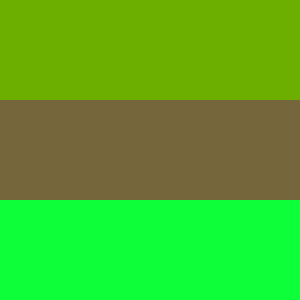

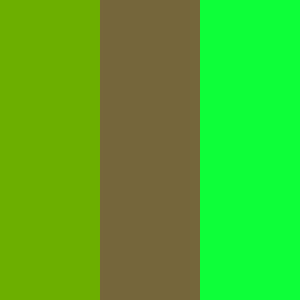

In [108]:
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
import random

r_color = [(random.randint(0,255),random.randint(0,255),random.randint(0,255)) for i in range(0,3)] #隨機產生三組顏色

imgL = [np.full((100, 300, 3), r_color[i], np.uint8) for i in range(0,3)] #將三組顏色做成高100*寬300的純色圖片
imgL2 = [np.full((300, 100, 3), r_color[i], np.uint8) for i in range(0,3)] #將三組顏色做成高300*寬100的純色圖片

img = np.concatenate(imgL) #將圖片合併
img2 = np.concatenate(imgL2,axis=1) #將圖片縱向(axis=1)合併

cv2_imshow(img)
print("\n")
cv2_imshow(img2)

$img= np.full(size, color, array.type)$
1. size(Tuple) 包含：高、寬、3(給有顏色的圖片使用的維度)
2. color(Tuple) 包含：B藍、G綠、R紅
3. array.type 基本上色彩空間都是8bit，此格填上**np.uint8**即可


#圖像運算add、subtract
>這邊的加減乘除都是矩陣對應值的加減


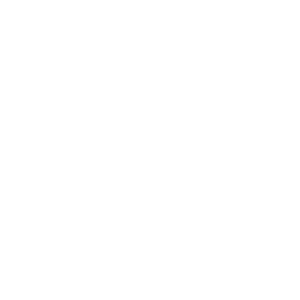

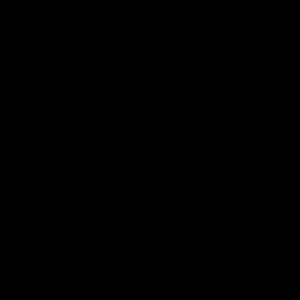

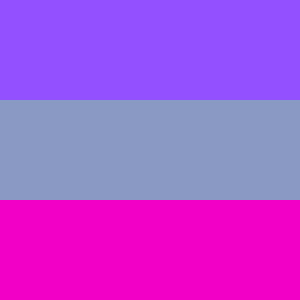

In [110]:
cv2_imshow(cv2.add(img, (255,255,255,0))) #可使用數組類別生成純色圖片，要注意i[3]=0是預留給透明度的值
cv2_imshow(cv2.subtract(img, (255,255,255,0)))
cv2_imshow(cv2.absdiff(img, (255,255,255,0))) #當運算出現負值的時候會取決對值，-255相當於取負片


>色彩的加減可做為亮度調整使用\
>+255會變成全白\
>+0不變\
>加減超過上下限時會直接顯示上下限的值(也就是 0 or 255)


#圖像運算divide、multifly

In [105]:
imgs = cv2.imread("IMG_4925.JPEG", 1)
imgs1 = cv2.divide(imgs, (25, 25, 25, 0)) #可透過乘除來分離簡化色彩，找出需要的區域
imgs2 = cv2.multiply(imgs1, (25, 25, 25, 0))
imgs3 = cv2.bitwise_not(imgs) #負片效果

# cv2_imshow(imgs1)
# cv2_imshow(imgs2)
# cv2_imshow(imgs3)
# print(np.array(imgs1))
# print(np.array(imgs2))

#cv2_imshow(imgs2+20)#尋找顏色區域，不在乎呈現效果

#縮放圖片的三種方式
>1. dsize同除固定數值 
>2. 固定寬或高，另一遍採等比例運算
>3. 調整fx、fy的比例

In [ ]:
imgresize = cv2.resize(imgs, (int(imgs.shape[1]/2), int(imgs.shape[0]/2)))#等比例縮放
w = 300
h = int((imgs.shape[0]/imgs.shape[1])*w)
imgresize2 = cv2.resize(imgs, (w, h))
imgresize3 = cv2.resize(imgs, None, fx=0.5,fy=0.5)#XY軸的縮放比例
cv2_imshow(imgresize)
cv2_imshow(imgresize2)
cv2_imshow(imgresize3)
print(imgresize.shape)
cv2_imshow(cv2.flip(imgresize, 1))

#旋轉圖片
>先生成一個旋轉矩陣\
>在將旋轉矩陣套入需要選轉的圖片

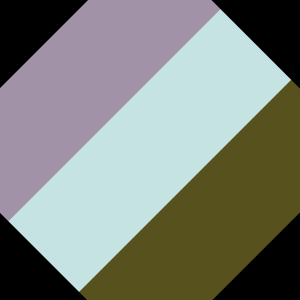

In [57]:
A = cv2.getRotationMatrix2D((150,150), 45, 1)
imgrr = cv2.warpAffine(img, A, (300, 300))
cv2_imshow(imgrr)

恭喜，有了旋轉矩陣你就可以做轉轉動畫了

In [ ]:
import time

video_1 = cv2.VideoWriter(
    "1.mp4",
    cv2.VideoWriter_fourcc(*'MP4V'),
    120, #影格數
    (300,300)
)

a = 0
while a < 4:
  for i in range(0,360):
    dp.clear_output(True)
    A = cv2.getRotationMatrix2D((150,150), i, 1-i/360)
    imgrr = cv2.warpAffine(img, A, (300, 300))
    video_1.write(imgrr)
    # time.sleep(0.1)
  for i in range(0,360):
    dp.clear_output(True)
    A = cv2.getRotationMatrix2D((150,150), i, i/360)
    imgrr = cv2.warpAffine(img, A, (300, 300))
    video_1.write(imgrr)
    # time.sleep(0.1)
  a+=1
video_1.release()

!ffmpeg -i 1.mp4 -vcodec libx264 2.mp4 #轉換檔案類型

import base64
import codecs
import IPython.display as dp

with codecs.open("2.mp4","rb") as f:
  D = base64.b64encode(f.read()).decode()

dp.HTML(
  f'<video src="data:video/mp4;base64,{D}" controls />'
)

#利用切片進行圖片裁切、與貼上圖片

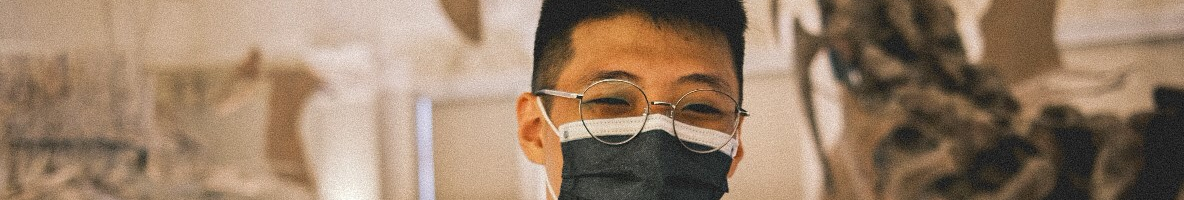

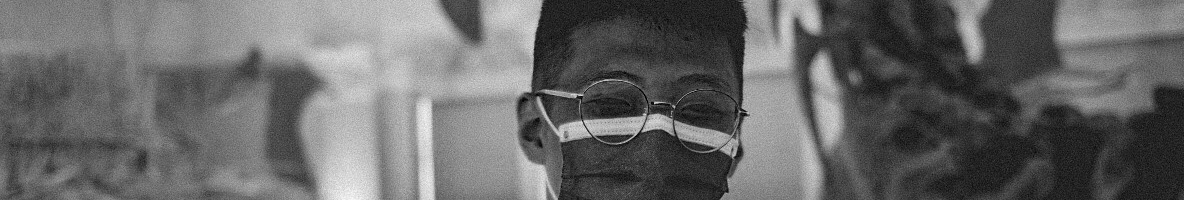

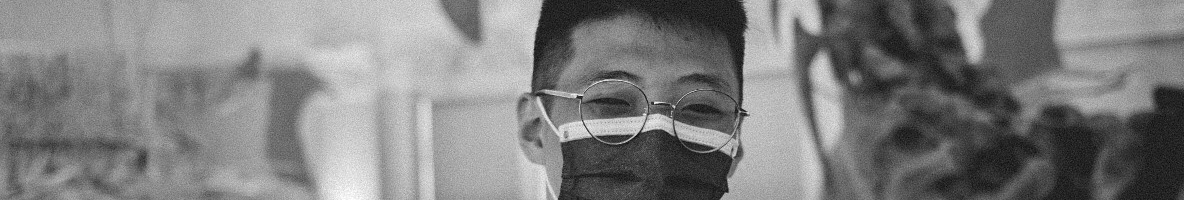

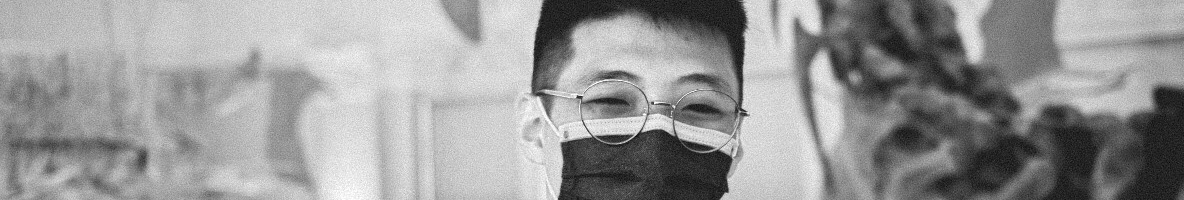

In [111]:
imgs4 = imgs[100:300,:]
cv2_imshow(imgs4)
cv2_imshow(imgs[100:300,:,0])#取藍色值空間
cv2_imshow(imgs[100:300,:,1])#取綠色值空間
cv2_imshow(imgs[100:300,:,2])#取紅色值空間
#雖然看起來都是灰色的但是那是不同維度拆分開來的，故系統會直接認定其為黑白圖片

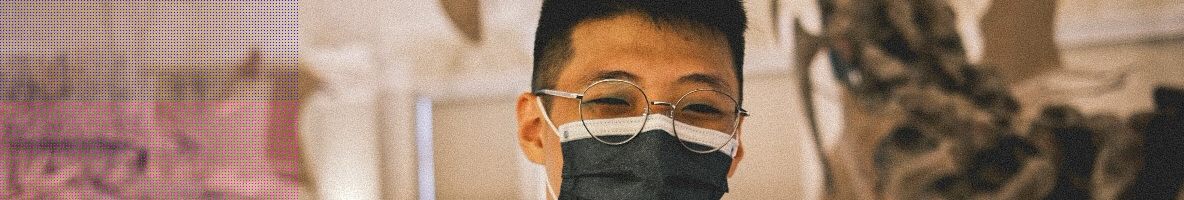

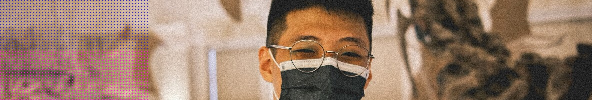

In [91]:
#利用切片設定在圖片中貼上圖片
imgs4 = imgs[100:300,:]
imgs4[0:200:3,0:300:3]=img[0:200:3,0:300:3] #要注意大小範圍 #要注意的是這個寫法會直接將圖片寫死
cv2_imshow(imgs4)

imgs5 = imgs[100:300:2,::2] #可以加入步距達成圖片壓縮的效果
cv2_imshow(imgs5)

# 白平衡調整

78.77654522094251 93.99965585279676 107.86048487473042


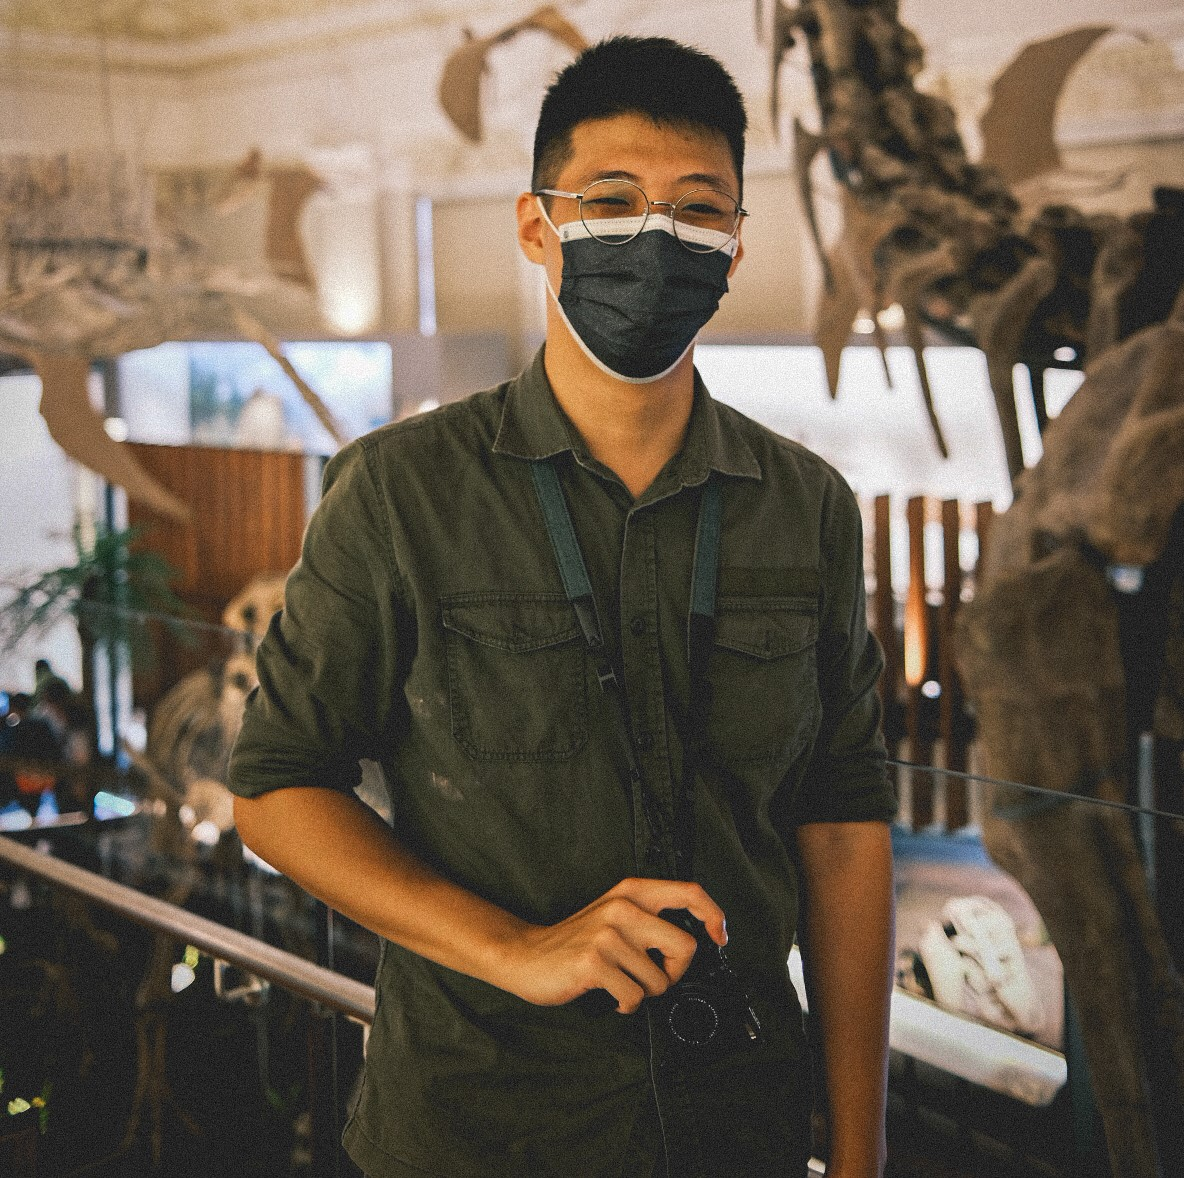

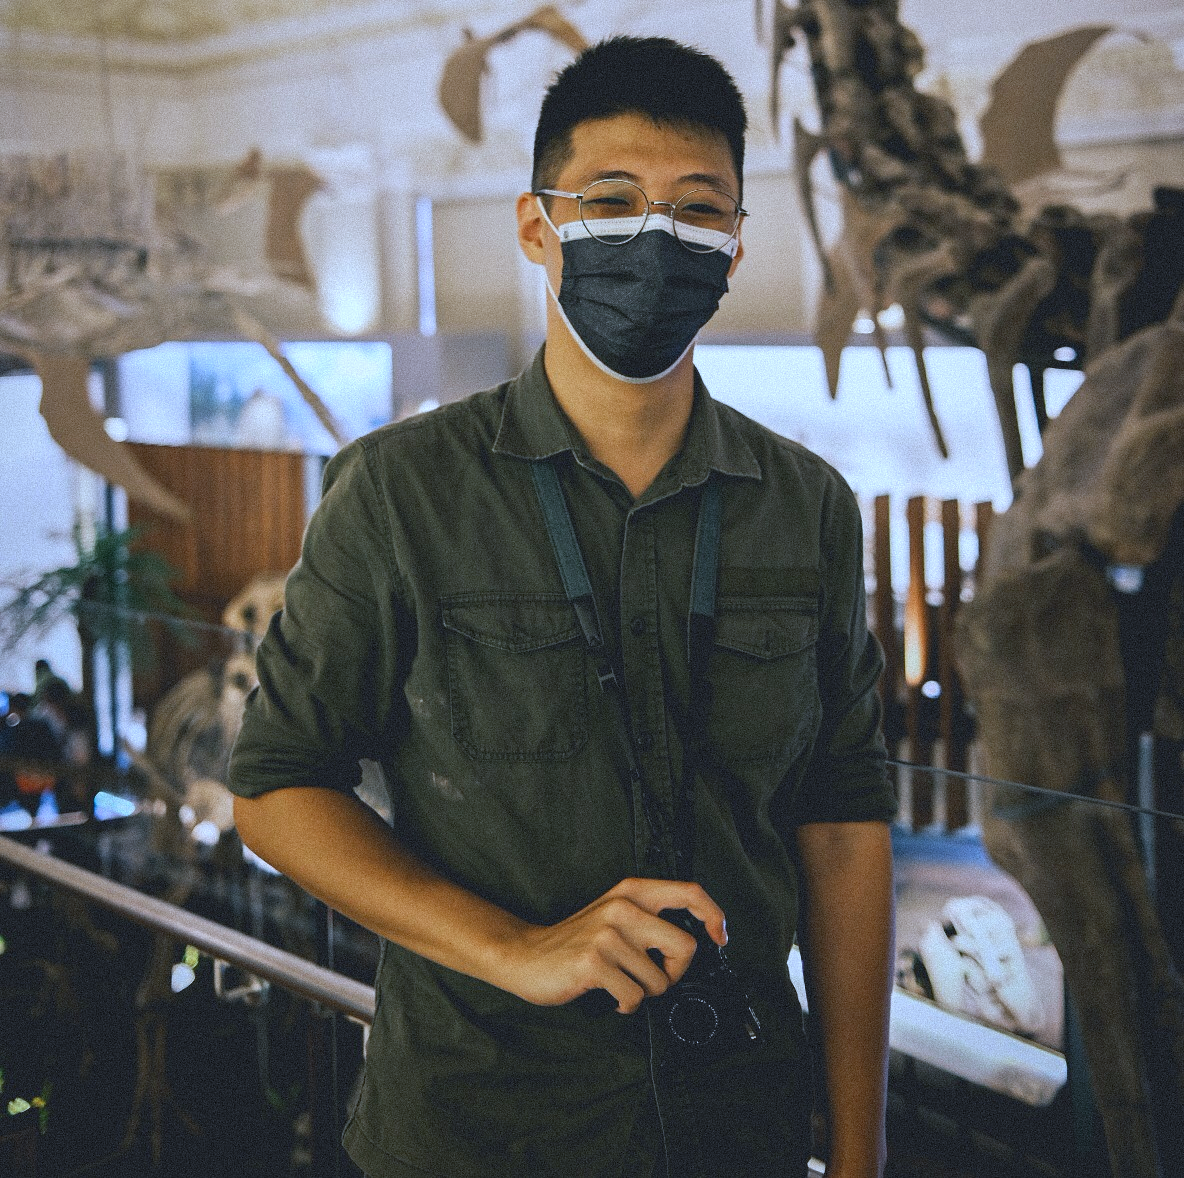

In [106]:
Bavg = imgs[:,:,0].mean()
Gavg = imgs[:,:,1].mean()
Ravg = imgs[:,:,2].mean()
BGRavg = Bavg + Gavg + Ravg

print(Bavg,Gavg,Ravg)

imgss = imgs.copy()

imgss[:,:,0] = cv2.multiply(imgs[:,:,0], (BGRavg/(3*Bavg)))
imgss[:,:,1] = cv2.multiply(imgs[:,:,1], (BGRavg/(3*Gavg)))
imgss[:,:,2] = cv2.multiply(imgs[:,:,2], (BGRavg/(3*Ravg)))

cv2_imshow(imgs)
cv2_imshow(imgss)

>可使用.maen()取得色彩平均值\
#白平衡公式
$
B \times \frac{B_{avg}+G_{avg}+R_{avg}}{3*B_{avg}}\\
G \times \frac{B_{avg}+G_{avg}+R_{avg}}{3*G_{avg}}\\
R \times \frac{B_{avg}+G_{avg}+R_{avg}}{3*R_{avg}}
$